In [55]:
import numpy as np
from math import sqrt
from PIL import Image

In [56]:
from torchvision import transforms

def get_pre_transform(image_size=224, crop=False, jitter=0):
    if crop:
        img_transform = [transforms.RandomResizedCrop(image_size, scale=[0.8, 1.0])]
    else:
        img_transform = [transforms.Resize((image_size, image_size))]
    if jitter > 0:
        img_transform.append(transforms.ColorJitter(brightness=jitter,
                                                    contrast=jitter,
                                                    saturation=jitter,
                                                    hue=min(0.5, jitter)))
    img_transform += [transforms.RandomHorizontalFlip(), lambda x: np.asarray(x)]
    img_transform = transforms.Compose(img_transform)
    return img_transform

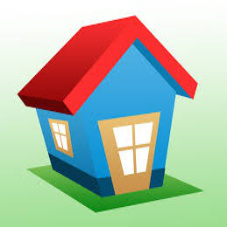

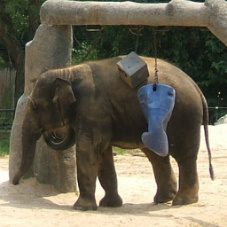

(224, 224, 3)

In [57]:
image1 = '/home/zhaoxin/data/DG/pacs/images/cartoon/house/pic_081.jpg'
image2= '/home/zhaoxin/data/DG/pacs/images/photo/elephant/n02503517_5418.jpg'
pre_transform = get_pre_transform()
img1 = Image.open(image1)
img2 = Image.open(image2)
img1.show()
img2.show()
img1 = pre_transform(img1)
img2 = pre_transform(img2)
img1.shape

[[[5449926.         5170152.         4305751.        ]
  [ 255308.17117952  293994.08503158  321907.20551523]
  [ 191776.29854065  238959.66219174  213862.20801732]
  ...
  [ 412628.21999105  424229.35612433  422274.60373744]
  [ 191776.29854065  238959.66219174  213862.20801732]
  [ 255308.17117952  293994.08503158  321907.20551523]]

 [[1497003.64136694 1338561.60348926 1134158.68966469]
  [ 376026.34026158  338781.51578789  268327.11478418]
  [ 403563.6309713   377001.9504613   382162.9246782 ]
  ...
  [ 369848.03978899  310177.8148726   214636.42180489]
  [ 394102.62208825  376464.72264484  329670.25924248]
  [ 319010.60136676  330912.70706129  367819.55074748]]

 [[ 790498.16535664  706292.23471262  680711.74509889]
  [ 105080.63728819   98465.46775871   61735.32209641]
  [  56328.99156677   23697.36598196   33039.69639926]
  ...
  [ 241456.47092669  222879.29431155  212840.23314529]
  [ 369658.28667973  338225.03194356  342037.23258468]
  [ 123733.2445755   136971.87823409  14471

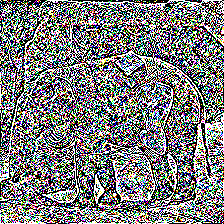

In [58]:
def colorful_spectrum(img):
    """Input image size: ndarray of [H, W, C]"""
  
    img_fft = np.fft.fft2(img, axes=(0, 1))
    img_abs, img_pha = np.abs(img_fft), np.angle(img_fft)

    print(img_abs)

    img_abs[:] = 1338561
    # print(img_abs)

    # img_abs = np.fft.fftshift(img_abs, axes=(0, 1))

    # img_abs = np.fft.ifftshift(img_abs, axes=(0, 1))
    
    # print(img_abs)

    img = img_abs * (np.e**(1j * img_pha))
    img = np.real(np.fft.ifft2(img, axes=(0, 1)))
    img = np.uint8(np.clip(img, 0, 255))

    return img

img1_f = colorful_spectrum(img2)
im=Image.fromarray(img1_f)
im.show() 

[[[8717943.         9338612.         8397192.        ]
  [ 878804.73254552 1309316.58016835  880081.36637919]
  [ 286927.63655731  415494.44059753  371010.06895394]
  ...
  [ 318139.07182375  159895.8094068    28919.87119555]
  [ 286927.63655731  415494.44059753  371010.06895394]
  [ 878804.73254552 1309316.58016835  880081.36637919]]

 [[1151663.16750039  764011.31059459  258850.04097684]
  [ 597094.61343793  656267.88693611  832175.88139289]
  [ 343231.89143363  433687.02158448  514826.27507336]
  ...
  [ 380648.04668292   77874.51050675  142946.80234979]
  [ 723795.7363938   460985.17107289  234385.15728216]
  [ 108787.20167263   86551.35695888   45464.03447754]]

 [[ 971876.0860678   853544.44093373 1069147.45343207]
  [ 352172.67306089  596179.54548312  623391.19587184]
  [ 367302.27690178  520499.49539693  578228.90958714]
  ...
  [ 139069.33374723  296890.75418771  192320.35521038]
  [ 232036.62720505  142350.07422216  297234.21786476]
  [ 485748.86120452  287348.60981319  13224

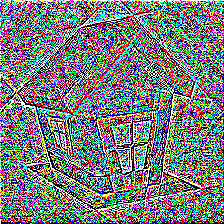